## Keras - Rede Neural LSTM(Long Short Term Memory)

***Importando as bibliotecas***

In [1]:
import math
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import warnings
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")

### Lendo a base (Histórico de preços da Gerdau)

In [2]:
def extract_data_qt(quote):
    yf.pdr_override()
    df = web.get_data_yahoo(quote, period='5y', rounding=True)
    return df

In [3]:
df_gerdau = extract_data_qt('GGBR4.SA')

[*********************100%***********************]  1 of 1 completed


In [4]:
df = df_gerdau[['Close']]
df['ds'] = df.index
df = df.rename(columns={"Close": "y"})

***Convertendo o dataframe em um array numpy e calculando o número de linhas para treinar o modelo***

In [5]:
ds = df["y"].values.reshape(-1,1)
training= math.ceil(len(ds) *.9)

***Dimensionando todos os dados para valores entre 0 e 1***

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(ds)

***Criando o conjunto de dados de treinamento***

In [7]:
train_df = scaled_df[0:training,:]

x_train = []
y_train = []
for i in range(30, len(train_df)):
    x_train.append(train_df[i-30:i, 0])
    y_train.append(train_df[i, 0])

***Convertendo x_train e y_train em matrizes numpy***

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

***Transformando os dados para a forma aceita pelo LSTM***

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Construindo o modelo de rede LSTM

In [10]:
model = Sequential()
model.add(LSTM(units = 450, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units = 450, return_sequences=False))
model.add(Dense(units=225))
model.add(Dense(units = 1))

***Treinando o modelo***

In [11]:
model.compile(loss="mean_squared_error")

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1089/1089 [==============================] - 382s 351ms/step - loss: 0.0176


***Teste***

In [13]:
test_df = scaled_df[training - 30:, :]
x_test = []
y_test = ds[training:, :]
for i in range(30, len(test_df)):
    x_test.append(test_df[i-30:i, 0])

In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

***Obtendo os valores de preços previstos dos modelos***

In [16]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

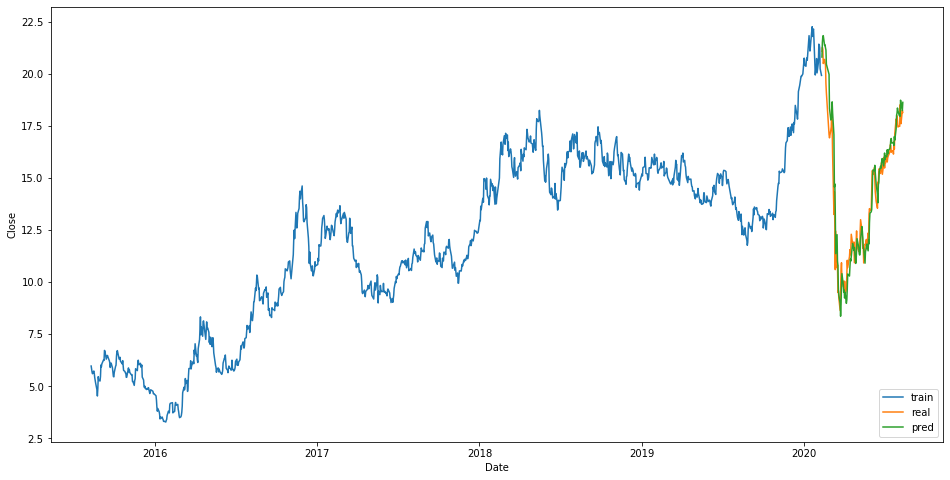

In [17]:
train = df[:training]
valid = df[training:]
valid['pred'] = pred

plt.figure(figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel("Close")
plt.plot(train['y'])
plt.plot(valid[['y', 'pred']])
plt.legend(["train", "real", "pred"], loc="lower right")
plt.show()

In [18]:
valid

,y,ds,pred
Date,,,
2020-02-11,21.09,2020-02-11,20.810791
2020-02-12,21.28,2020-02-12,21.525263
2020-02-13,21.18,2020-02-13,21.811144
2020-02-14,20.50,2020-02-14,21.839800
2020-02-17,20.70,2020-02-17,21.364544
...,...,...,...
2020-08-05,18.52,2020-08-05,17.963963
2020-08-06,18.06,2020-08-06,18.739601
2020-08-07,17.61,2020-08-07,18.577152


#### Realizando uma validação

In [19]:
def mape(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [20]:
rmse=np.sqrt(np.mean((pred-y_test)**2))
rmse

0.8697848197409661

In [21]:
mape(pred, y_test)

0.046503193149005626

***Vamos utilizar esse modelo em outras bases***

### Lendo a base (Histórico de preços da Rumo)

In [22]:
df_rumo = extract_data_qt('RAIL3.SA')

[*********************100%***********************]  1 of 1 completed


In [23]:
df = df_rumo[['Close']]
df['ds'] = df.index
df = df.rename(columns={"Close": "y"})

In [24]:
ds = df["y"].values.reshape(-1,1)
training= math.ceil(len(ds) *.9)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(ds)

***Criando conjunto de dados de treinamento***

In [25]:
train_df = scaled_df[0:training,:]

x_train = []
y_train = []
for i in range(30, len(train_df)):
    x_train.append(train_df[i-30:i, 0])
    y_train.append(train_df[i, 0])

In [26]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Construindo o modelo de rede LSTM

In [27]:
model = Sequential()
model.add(LSTM(units = 450, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units = 450, return_sequences=False))
model.add(Dense(units=225))
model.add(Dense(units = 1))

In [28]:
model.compile(loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=1)

1089/1089 [==============================] - 348s 319ms/step - loss: 0.0207


***Teste***

In [29]:
test_df = scaled_df[training - 30:, :]
x_test = []
y_test = ds[training:, :]
for i in range(30, len(test_df)):
    x_test.append(test_df[i-30:i, 0])

In [30]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

***Realizando a predição***

In [31]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

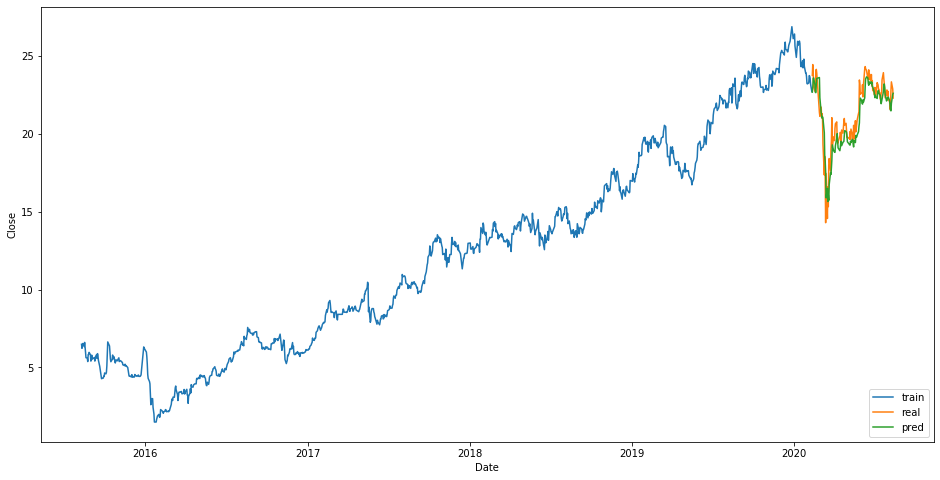

In [32]:
train = df[:training]
valid = df[training:]
valid['pred'] = pred

plt.figure(figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel("Close")
plt.plot(train['y'])
plt.plot(valid[['y', 'pred']])
plt.legend(["train", "real", "pred"], loc="lower right")
plt.show()

In [33]:
valid

,y,ds,pred
Date,,,
2020-02-11,23.75,2020-02-11,22.671535
2020-02-12,24.44,2020-02-12,22.955711
2020-02-13,23.80,2020-02-13,23.544220
2020-02-14,23.02,2020-02-14,23.581686
2020-02-17,22.72,2020-02-17,23.126921
...,...,...,...
2020-08-05,21.89,2020-08-05,21.507288
2020-08-06,22.77,2020-08-06,21.470289
2020-08-07,23.33,2020-08-07,21.944038


#### Realizando uma validação

In [34]:
rmse=np.sqrt(np.mean((pred-y_test)**2))
rmse

0.9919060741582337

In [35]:
mape(pred, y_test)

0.03623028877059548

### Lendo a base (Histórico de preços da Marfrig)

In [36]:
df_marfrig = extract_data_qt('MRFG3.SA')

[*********************100%***********************]  1 of 1 completed


In [37]:
df = df_marfrig[['Close']]
df['ds'] = df.index
df = df.rename(columns={"Close": "y"})

In [38]:
ds = df["y"].values.reshape(-1,1)
training= math.ceil(len(ds) *.9)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(ds)

***Criando conjunto de dados de treinamento***

In [39]:
train_df = scaled_df[0:training,:]

x_train = []
y_train = []
for i in range(30, len(train_df)):
    x_train.append(train_df[i-30:i, 0])
    y_train.append(train_df[i, 0])

In [40]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Construindo o modelo de rede LSTM

In [41]:
model = Sequential()
model.add(LSTM(units = 450, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units = 450, return_sequences=False))
model.add(Dense(units=225))
model.add(Dense(units = 1))

In [42]:
model.compile(loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=1)

1089/1089 [==============================] - 274s 252ms/step - loss: 0.0521


***Teste***

In [43]:
test_df = scaled_df[training - 30:, :]
x_test = []
y_test = ds[training:, :]
for i in range(30, len(test_df)):
    x_test.append(test_df[i-30:i, 0])

In [44]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

***Realizando a predição***

In [45]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

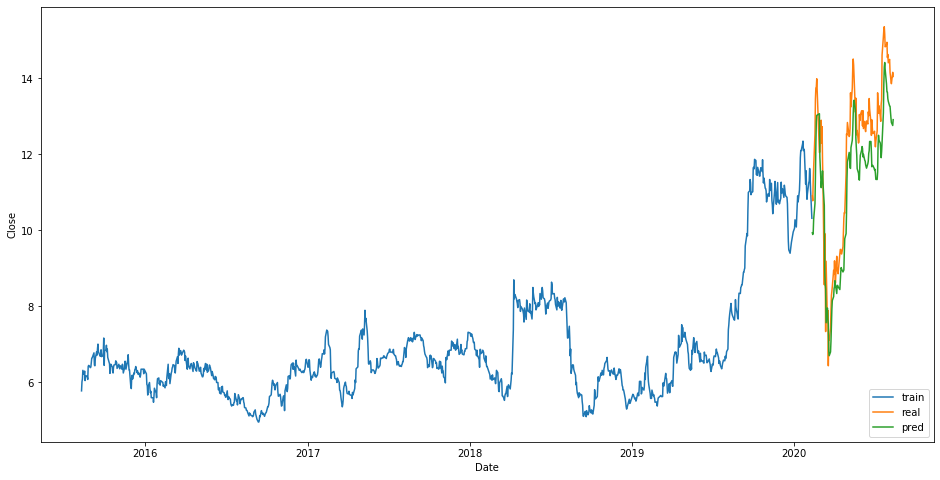

In [46]:
train = df[:training]
valid = df[training:]
valid['pred'] = pred

plt.figure(figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel("Close")
plt.plot(train['y'])
plt.plot(valid[['y', 'pred']])
plt.legend(["train", "real", "pred"], loc="lower right")
plt.show()

In [47]:
valid

,y,ds,pred
Date,,,
2020-02-11,10.91,2020-02-11,9.938540
2020-02-12,10.78,2020-02-12,9.892911
2020-02-13,11.30,2020-02-13,9.948282
2020-02-14,11.65,2020-02-14,10.289999
2020-02-17,12.54,2020-02-17,10.709783
...,...,...,...
2020-08-05,14.06,2020-08-05,13.108089
2020-08-06,13.94,2020-08-06,12.959505
2020-08-07,13.86,2020-08-07,12.839643


#### Realizando uma validação

In [48]:
rmse=np.sqrt(np.mean((pred-y_test)**2))
rmse

1.0754855403498327

In [49]:
mape(pred, y_test)

0.08052413345917599